<a href="https://colab.research.google.com/github/arad1367/WAC_November-2023/blob/main/Session_7_Nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine learning with scikit-learn (Supervised learning: Classification)

In [1]:
machine_learning_step = {1: "Get data ready",
                         2: "Data preprocessing",
                         3: "Features and target",
                         4: "Split data",
                         5: "Model",
                         6: "Fit the model with train data",
                         7: "Make prediction",
                         8: "Accuracy",
                         9: "Improvement with hyperparameters",
                         10: "Save the model",
                         11: "Work with object columns"}

In [3]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder

### 1. Get data ready


In [5]:
medical_data = load_breast_cancer()
medical_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
df = pd.DataFrame(data = medical_data['data'],
                  columns = medical_data['feature_names'])
df.head()

df['target'] = medical_data['target']
df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


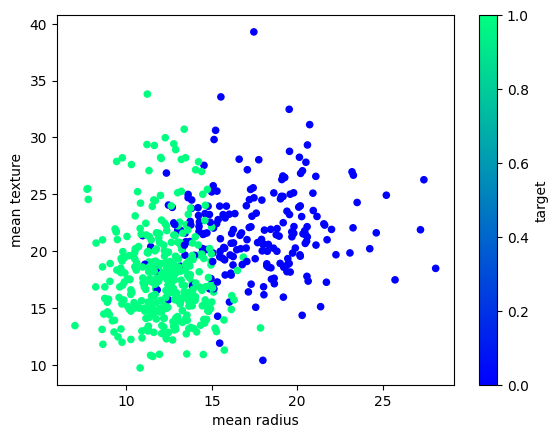

In [10]:
# See a plot about our data
df.plot(kind='scatter',
        x='mean radius',
        y='mean texture',
        c='target',
        cmap='winter');

In [11]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 2. Data Preprocessing

In [13]:
# Check missin values / we can handle missing values with dropna() or fillna()
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 3. Features and target

In [16]:
X = df.drop('target', axis=1)
y = df['target']

X[:5], y[:5]

print(len(df))

569


In [17]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 4. Split data

In [23]:
# Split data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)
len(X_train) == len(y_train)
len(X_test) == len(y_test)
len(X_train), len(y_train), len(X_test), len(y_test)

(398, 398, 171, 171)

In [24]:
machine_learning_step


{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 5. Model

In [28]:
# Make our first model
RFC_model = RandomForestClassifier()
RFC_model

# Parameters related to RFC model
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 6. Fit the model with train data

In [30]:
RFC_model.fit(X_train, y_train)
RFC_model

RandomForestClassifier()

### 7. Make prediction

In [31]:
y_preds_RFC = RFC_model.predict(X_test)
y_preds_RFC[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [33]:
np.array(y_test[:10])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

### 8. Accuracy

In [34]:
RFC_score = RFC_model.score(X_test, y_test)
print(f"Accuracy of RFC model is: {RFC_score * 100:0.2f} %")

Accuracy of RFC model is: 96.49 %


### Make a function for accuracy (classification)

In [37]:
def accuracy_classification(y_true, y_pred):
  """
  This function can calculate accuracy for classification models.
  """
  acc_score = accuracy_score(y_true, y_pred)
  conf_matrix = confusion_matrix(y_true, y_pred)
  class_reports = classification_report(y_true, y_pred)
  return {
      'Accuracy_score':acc_score,
      'Confusion_matrix':conf_matrix,
      'Classification_report':class_reports
  }

In [39]:
RFC_score

0.9649122807017544

In [38]:
pprint(accuracy_classification(y_true=y_test,
                        y_pred=y_preds_RFC))

{'Accuracy_score': 0.9649122807017544,
 'Classification_report': '              precision    recall  f1-score   '
                          'support\n'
                          '\n'
                          '           0       0.97      0.94      0.95        '
                          '63\n'
                          '           1       0.96      0.98      0.97       '
                          '108\n'
                          '\n'
                          '    accuracy                           0.96       '
                          '171\n'
                          '   macro avg       0.97      0.96      0.96       '
                          '171\n'
                          'weighted avg       0.96      0.96      0.96       '
                          '171\n',
 'Confusion_matrix': array([[ 59,   4],
       [  2, 106]])}


In [40]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

In [42]:
RFC_model.get_params()

# task: kust try to improve the accuracy of RFC_model with different values of n_estimators

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [43]:
RFC_score

0.9649122807017544

In [49]:
# Second model --> SVC

SVC_model = SVC()
SVC_model
SVC_model.get_params()

SVC_model.fit(X_train, y_train)
SVC_model

y_preds_SVC = SVC_model.predict(X_test)
y_preds_SVC[:10], np.array(y_test[:10])

SVC_score = SVC_model.score(X_test, y_test)
print(f"The accuracy of SVC modfel is: {SVC_score * 100:0.2f} %")

The accuracy of SVC modfel is: 93.57 %


In [51]:
pprint(accuracy_classification(y_true=y_test,
                               y_pred=y_preds_SVC))

{'Accuracy_score': 0.935672514619883,
 'Classification_report': '              precision    recall  f1-score   '
                          'support\n'
                          '\n'
                          '           0       1.00      0.83      0.90        '
                          '63\n'
                          '           1       0.91      1.00      0.95       '
                          '108\n'
                          '\n'
                          '    accuracy                           0.94       '
                          '171\n'
                          '   macro avg       0.95      0.91      0.93       '
                          '171\n'
                          'weighted avg       0.94      0.94      0.93       '
                          '171\n',
 'Confusion_matrix': array([[ 52,  11],
       [  0, 108]])}


In [66]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [67]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [57]:
# Third model -- > Kneighbors

KNN_model = KNeighborsClassifier(n_neighbors=2)
KNN_model
KNN_model.get_params()

KNN_model.fit(X_train, y_train)

y_preds_KNN = KNN_model.predict(X_test)
y_preds_KNN[:10], np.array(y_test[:10])

KNN_score = KNN_model.score(X_test, y_test)
KNN_score

0.9298245614035088

In [58]:
KNN_score, RFC_score, SVC_score

(0.9298245614035088, 0.9649122807017544, 0.935672514619883)

In [59]:
pprint(accuracy_classification(y_true = y_test,
                               y_pred = y_preds_KNN))

{'Accuracy_score': 0.9298245614035088,
 'Classification_report': '              precision    recall  f1-score   '
                          'support\n'
                          '\n'
                          '           0       0.87      0.95      0.91        '
                          '63\n'
                          '           1       0.97      0.92      0.94       '
                          '108\n'
                          '\n'
                          '    accuracy                           0.93       '
                          '171\n'
                          '   macro avg       0.92      0.93      0.93       '
                          '171\n'
                          'weighted avg       0.93      0.93      0.93       '
                          '171\n',
 'Confusion_matrix': array([[60,  3],
       [ 9, 99]])}


### Make a visualisation plot for scores

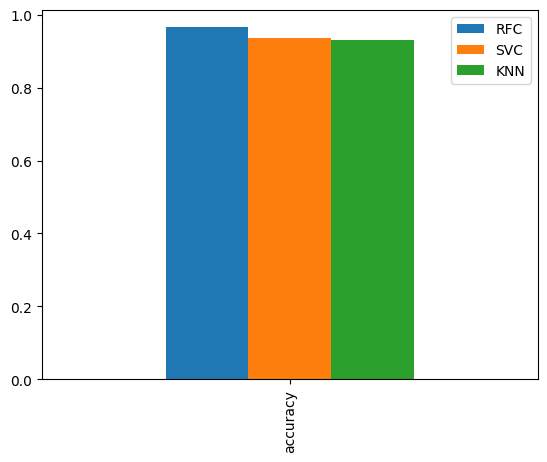

In [63]:
compare_df = pd.DataFrame(data={
    'RFC':RFC_score,
    'SVC':SVC_score,
    'KNN':KNN_score
}, index=['accuracy'])

compare_df.plot.bar();

In [64]:
# Save and load model

In [65]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model',
 11: 'Work with object columns'}

### 11. Work with object columns

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/arad1367/WAC_November-2023/main/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [69]:
len(df)

200

In [70]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [79]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


### Use LabelEncoder() - Convert string to numerical format

In [88]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [89]:
labelencoder = LabelEncoder()

In [92]:
# Assigning numerical values and save them in our df
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['BP'] = labelencoder.fit_transform(df['BP'])
df['Cholesterol'] = labelencoder.fit_transform(df['Cholesterol'])
df['Drug'] = labelencoder.fit_transform(df['Drug'])

In [93]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex\t
0,23,0,0,0,25.355,0,0
1,47,1,1,0,13.093,3,1
2,47,1,1,0,10.114,3,1
3,28,0,2,0,7.798,4,0
4,61,0,1,0,18.043,0,0
5,22,0,2,0,8.607,4,0
6,49,0,2,0,16.275,0,0
7,41,1,1,0,11.037,3,1
8,60,1,2,0,15.171,0,1
9,43,1,1,1,19.368,0,1


In [95]:
df['Sex'].value_counts()
df['Drug'].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

### Use RFC --- Make a model

In [97]:
# Make X , y
X = df.drop('Drug', axis=1)
y = df['Drug']
y[:5], X[:5]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
len(X_train) == len(y_train)

# Make a model
RFC_drug_model = RandomForestClassifier()
RFC_drug_model

# Fit the model
RFC_drug_model.fit(X_train, y_train)

# Score
RFC_score = RFC_drug_model.score(X_test, y_test)
print(f"The accuracy of model is: {RFC_score * 100:0.2f} %")

The accuracy of model is: 100.00 %
